In [ ]:
Bernat Sort Rufat
MD004_Advanced data analysis and visualization tools
Máster en Data Science

# Trabajo del Tema 5: Matriz de covarianza y ANOVA

Objetivos:

- Desarrollo teórico de las suposiciones de ANOVA: breve desarrollo teórico sobre el significado de estas suposiciones y comprobar que los datos las cumplen.

- Visualización y comprensión del dataset: Se pide visualizar y realizar estadísticos que ayuden a comprender mejor el dataset dentro del dominio de ANOVA.

- Calcular la prueba ANOVA unidireccional para la variable fertilizer.

- Calcular la prueba ANOVA bidireccional para las variables fertilizer y región.

## Carga de packages

In [169]:
library(ggplot2)
library(lmtest)

install.packages("lawstat")
library(lawstat)

library(dplyr)

## Carga de datos

In [238]:
# cargamos los datos en el df
field_data <- read.csv(file="field_data.csv", header=TRUE, sep=",", dec=".")

## Exploración básica inical de los datos

El dataset contiene datos sobre el rendimiento de algunos campos de cultivo y las características del terreno. Incluye 96
instancias y 6 variables.

<u>Definición variables<u>
- Height : altura del cultivo
- Temp : temperatura en Fahrenheit
- Humidity : humedad en
- Fertilizer : fertilizante usado
- Yield : rendimiento del cultivo
- Region : región por tipo

In [2]:
# las 3 primeras filas del df
head(field_data,3)

,height,temp,humidity,fertilizer,yield,region
,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1,70,72,1,397.2287,1
2,2,68,76,1,397.5500,2
3,1,69,63,1,396.4085,3


- Comprobamos que efectivamente tenemos 6 variables: height, temp, humidity, fertilizer, yield, region. 

In [3]:
# dimensión del df (filas y columnas)
dim(field_data)

[1] 96  6

- El dataset incluye 96 instancias (filas) y 6 variables (columnas).

In [4]:
# estructura interna compacta del df
str(field_data)

'data.frame':	96 obs. of  6 variables:
 $ height    : int  1 2 1 2 1 2 1 2 1 2 ...
 $ temp      : int  70 68 69 69 70 68 67 64 70 64 ...
 $ humidity  : int  72 76 63 65 76 67 77 74 67 62 ...
 $ fertilizer: int  1 1 1 1 1 1 1 1 1 1 ...
 $ yield     : num  397 398 396 398 397 ...
 $ region    : int  1 2 3 4 1 2 3 4 1 2 ...


- Parece que los datos proceden de distintas regiones y que el rendimiento del campo se ve afectado por la altura, la temperatura, la humedad, el tipo de fertilizante y la región.

- Los tipos de datos de todas las columnas son int y num, lo que indica que todas las columnas contienen valores numéricos. No obstante, tanto el fertilizante como la región en realidad son variables categóricas. Por lo tanto, deberemos hacer la conversión de numéricas a categóricas. 


In [7]:
# convertimos la región y el fertilizante de tipo de dato numérico a categórico
field_data$region = as.factor(field_data$region)
field_data$fertilizer = as.factor(field_data$fertilizer)

- Además, la temperatura está expresada en Fahrenheit. Para poder entenderla mejor, la convertiremos a Celsius. 

- Para convertir la columna temp de Fahrenheit a Celsius, utilizamos la siguiente fórmula:

    - C = (F - 32) * (5/9)

        - Donde C es la temperatura en grados Celsius y F es la temperatura en grados Fahrenheit.


In [9]:
# convertimos la temp de Fahrenheit a Celsius
field_data$temp = (field_data$temp - 32) * (5/9)

In [209]:
# estructura interna compacta del df con la región y el fertilizante como variables categóricas
# y la temperatura en grados Celsius
str(field_data)

# Mostramos los levels: 
# fertilizer y region son los factors y las diferentes categorias o tipos de fertilizante y región 
# son los factor levels.
message('\n')
levels(field_data$fertilizer)
levels(field_data$region)

'data.frame':	96 obs. of  6 variables:
 $ height    : int  1 2 1 2 1 2 1 2 1 2 ...
 $ temp      : num  21.1 20 20.6 20.6 21.1 ...
 $ humidity  : int  72 76 63 65 76 67 77 74 67 62 ...
 $ fertilizer: Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ yield     : num  397 398 396 398 397 ...
 $ region    : Factor w/ 4 levels "1","2","3","4": 1 2 3 4 1 2 3 4 1 2 ...


[1] "1" "2" "3"

[1] "1" "2" "3" "4"

- Observamos que hemos convertido correctamente la columna temp de Fahrenheit a Celsius, y también las columnas región y fertilizante de tipos de datos int a Factor, lo cual es una buena práctica ya que son variables categóricas.

- Observamos que hay 3 tipos de fertilizante utilizado y 4 tipos de regiones. 


In [11]:
# visión general del df
summary(field_data)

     height         temp          humidity     fertilizer     yield      
 Min.   :1.0   Min.   :15.56   Min.   :60.00   1:32       Min.   :395.4  
 1st Qu.:1.0   1st Qu.:16.67   1st Qu.:64.75   2:32       1st Qu.:396.5  
 Median :1.5   Median :18.89   Median :69.00   3:32       Median :397.1  
 Mean   :1.5   Mean   :18.42   Mean   :70.03              Mean   :397.0  
 3rd Qu.:2.0   3rd Qu.:20.00   3rd Qu.:77.00              3rd Qu.:397.4  
 Max.   :2.0   Max.   :21.11   Max.   :80.00              Max.   :399.1  
 region
 1:24  
 2:24  
 3:24  
 4:24  
       
       

La función summary() proporciona algunas estadísticas básicas para cada variable del conjunto de datos.

- Para la altura, el valor mínimo es 1, el valor máximo es 2 y la mediana es 1.5, lo que indica que la mayoría de las observaciones tienen una altura de 1.5.

- Para la temperatura, el valor mínimo es 15.56, el valor máximo es 21.11 y la mediana es 18.89, lo que indica que la temperatura durante las observaciones oscila entre 15.56 y 21.11 grados Celsius.

- Para la humedad, el valor mínimo es 60, el valor máximo es 80 y la mediana es 69, lo que indica que la humedad durante las observaciones se encuentra en el intervalo de 60% a 80%.

- Para el fertilizante, observamos que tenemos 3 tipos de fertilizante: 1, 2 y 3. El resumen también muestra el recuento de observaciones para cada nivel de fertilizante, con 32 observaciones para cada nivel.

- Para el rendimiento, el valor mínimo es 395.4, el valor máximo es 399.1 y la mediana es 397.1, lo que indica que el rendimiento del campo se encuentra en el intervalo de 395.4 a 399.1.

- Para la región, el resumen también  el recuento de observaciones para cada nivel de región, con 24 observaciones para cada uno de los 4 niveles.


In [12]:
# miramos si hay valores nulos
sum(is.na(field_data))

[1] 0

- Observamos que no hay valores nulos en el dataset. 

Queremos ver si la región y el fertilizante influyen en el rendimiento de los cultivos. 

Separamos los data sets y hacemos un resumen de cada tipo de región y de fertilizante.

In [27]:
# Nos quedamos con region, fertilizer y yield, que son las variables que nos interesan
field_fert_reg_yield <- dplyr::select(field_data, fertilizer, region, yield)

In [29]:
# datos_fertilizante se crea eliminando la columna "region" del df original
# datos_region se crea eliminando la columna "fertilizante" del df original
datos_fertilizer <- dplyr::select(field_fert_reg_yield, -'region')
datos_region <- dplyr::select(field_fert_reg_yield, -'fertilizer')

# Creamos subconjuntos de los df datos_fertilizante y datos_region, basándonos en los valores de las columnas 
# fertilizante y región, respectivamente.

summary(subset(datos_fertilizer,fertilizer=='1'))
summary(subset(datos_fertilizer,fertilizer=='2'))
summary(subset(datos_fertilizer,fertilizer=='3'))

message('\n')

summary(subset(datos_region,region=='1'))
summary(subset(datos_region,region=='2'))
summary(subset(datos_region,region=='3'))
summary(subset(datos_region,region=='4'))

 fertilizer     yield      
 1:32       Min.   :395.4  
 2: 0       1st Qu.:396.1  
 3: 0       Median :396.8  
            Mean   :396.8  
            3rd Qu.:397.2  
            Max.   :398.4  

 fertilizer     yield      
 1: 0       Min.   :395.7  
 2:32       1st Qu.:396.5  
 3: 0       Median :397.0  
            Mean   :396.9  
            3rd Qu.:397.4  
            Max.   :398.1  

 fertilizer     yield      
 1: 0       Min.   :396.3  
 2: 0       1st Qu.:397.0  
 3:32       Median :397.3  
            Mean   :397.4  
            3rd Qu.:397.7  
            Max.   :399.1  

 region     yield      
 1:24   Min.   :395.4  
 2: 0   1st Qu.:396.4  
 3: 0   Median :397.0  
 4: 0   Mean   :396.9  
        3rd Qu.:397.3  
        Max.   :398.1  

 region     yield      
 1: 0   Min.   :396.0  
 2:24   1st Qu.:396.9  
 3: 0   Median :397.2  
 4: 0   Mean   :397.3  
        3rd Qu.:397.8  
        Max.   :398.4  

 region     yield      
 1: 0   Min.   :395.7  
 2: 0   1st Qu.:396.3  
 3:24   Median :396.7  
 4: 0   Mean   :396.7  
        3rd Qu.:397.2  
        Max.   :397.7  

 region     yield      
 1: 0   Min.   :395.9  
 2: 0   1st Qu.:396.9  
 3: 0   Median :397.1  
 4:24   Mean   :397.2  
        3rd Qu.:397.4  
        Max.   :399.1  

- Parece que hay muy poca variación en los valores de rendimiento entre los distintos fertilizantes y regiones. En ambos casos, los valores medios del rendimiento son muy similares, con pequeñas variaciones. 

- No obstante, para poder afirmar que las medias son similares debemos comprobar también las varianzas, ya que es importante considerar la dispersión de los datos. Si las varianzas también son similares, es más probable que las medias sean realmente similares. Sin embargo, si las varianzas son significativamente diferentes, puede indicar que las medias no son tan similares como parecen. 



Matriz de covarianza:
- Una matriz de covarianza puede utilizarse para visualizar la relación lineal entre todas las variables del dataset. 
- La matriz proporciona la covarianza entre cada par de variables del dataset, lo que puede ayudar a identificar patrones y correlaciones en los datos.
- Se utiliza normalmente para medir la asociación lineal entre pares de variables continuas. Por tanto, deberemos descartar las variables categóricas como fertilizante y región. Para comprender el impacto del fertilizante y la región en el rendimiento, es más informativo utilizar técnicas como el ANOVA, en lugar de una matriz de covarianza.
- Nos centraremos en las variables continuas. 

- Los elementos diagonales de la matriz representan la varianza de cada variable, mientras que los elementos no diagonales representan la covarianza entre dos variables diferentes.
- Una covarianza positiva entre dos variables indica que a medida que una variable aumenta, la otra también tiende a aumentar. 
- Una covarianza negativa indica que a medida que una variable aumenta, la otra tiende a disminuir. - Una covarianza nula indica que no existe relación lineal entre las dos variables.


In [230]:
# df con las variables numéricas
data_field_num <- dplyr::select(field_data, height, temp, humidity,	yield)

In [232]:
# Compute the covariance matrix
cov_matrix <- cov(data_field_num)

# Print the covariance matrix
cov_matrix

,height,temp,humidity,yield
height,0.25263158,-0.08479532,-0.04736842,0.11670469
temp,-0.08479532,3.43293129,0.11421784,0.02160259
humidity,-0.04736842,0.11421784,46.15690789,-0.50108743
yield,0.11670469,0.02160259,-0.50108743,0.44162351


- Observando los valores de la diagonal (la varianza), vemos que la variable de temperatura tiene una dispersión de valores relativamente alta, mientras que las variables de altura y rendimiento tienen una dispersión de valores relativamente baja.

- Observando los valores no diagonales:
    - La covarianza entre las variables altura y temperatura es negativa, lo que indica que a medida que aumenta la altura, disminuye la temperatura.

    - La covarianza entre la altura y la humedad es también negativa, lo que indica que a medida que aumenta la altura disminuye la humedad.

    - La covarianza entre la altura y el rendimiento es positiva, lo que indica que a medida que aumenta la altura, aumenta el rendimiento.

    - La covarianza entre las variables temperatura y humedad es positiva, lo que indica que a medida que aumenta la temperatura, aumenta la humedad.

    - La covarianza entre la temperatura y el rendimiento es positiva, lo que indica que a medida que aumenta la temperatura, aumenta el rendimiento.

    - La covarianza entre la humedad y el rendimiento es negativa, lo que indica que a medida que aumenta la humedad, disminuye el rendimiento.

- Por lo tanto, a partir de esta matriz, podemos observar que existe una relación positiva entre la temperatura y el rendimiento, y una relación negativa entre la humedad y el rendimiento. Además, existe una relación negativa entre la altura y la temperatura y la humedad. Esto puede sugerir que a mayor temperatura, mayor rendimiento y a menor humedad, mayor rendimiento. Por otro lado, a mayor altura, menor temperatura y humedad.
- No debemos olvidar que esta matriz sólo describe la relación lineal entre variables (las relaciones no lineales no pueden ser capturadas por esta matriz). 


## Primeras suposiciones

In [30]:
datos_fertilizer %>% # pasamos los datos en el objeto datos_fertilizer como entrada a la siguiente operación
    group_by(fertilizer) %>%  # agrupamos los datos en el objeto datos_fertilizer por la variable "fertilizer"   
    # calculamos la media y la desviación estándar de la variable "yield" para cada grupo de fertilizante.  
    summarize(media = mean(yield), desv = sd(yield))

datos_region %>%
    group_by(region) %>% 
    summarize(media = mean(yield), desv = sd(yield))

fertilizer,media,desv
<fct>,<dbl>,<dbl>
1,396.7570,0.6849233
2,396.9332,0.5740668
3,397.3562,0.5991214


region,media,desv
<fct>,<dbl>,<dbl>
1,396.8564,0.6276010
2,397.3169,0.6450171
3,396.7126,0.5906473
4,397.1760,0.6492183


- Podemos observar que el rendimiento medio de todos los grupos de fertilizantes y regiones es muy parecido, con valores que oscilan entre 396.7126 y 397.3562. 

- La desviación estándar del rendimiento de todos los grupos también es relativamente pequeña, con valores que oscilan entre 0.5740668 y 0.6450171, lo que sugiere que el rendimiento es relativamente constante dentro de cada grupo.

- Basándonos únicamente en este análisis, no podemos afirmar que los valores de rendimiento no se vean afectados por el tipo de abono y la región.

- También es importante tener en cuenta que aunque la media y la desviación típica sean similares, eso no implica que la distribución de los datos sea similar. 

Representamos el histograma con los datos.

Histograma para visualizar la distribución de la variable "yield" para tres grupos diferentes de fertilizante. 

In [35]:
# para poder establecer el límite en x (xlim) miramos el valor mínimo y máximo: 
range(datos_fertilizer$yield)

[1] 395.3608 399.0609

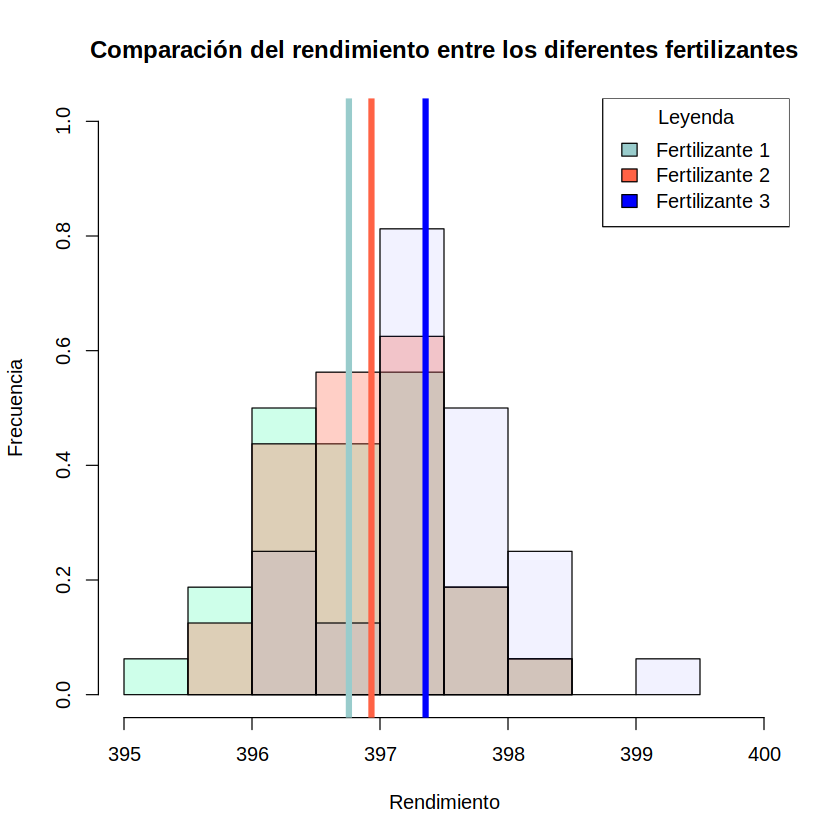

In [89]:
hist(subset(datos_fertilizer,fertilizer=='1')[,'yield'],
    col = rgb(0.369,1,0.737,0.3),
    main = 'Comparación del rendimiento entre los diferentes fertilizantes',  
    freq = F,
    ylim = c(0,1),
    xlim = c(395, 400),
    xlab='Rendimiento',
    ylab = 'Frecuencia') #verde
hist(subset(datos_fertilizer,fertilizer=='2')[,'yield'],
    col = rgb(1,0.384,0.272,0.3),
    add = T,
    ylim = c(0,1),
    xlim = c(395, 400),
    freq = F) #naranja
hist(subset(datos_fertilizer,fertilizer=='3')[,'yield'],
    col = rgb(0,0,1,0.05),
    add = T,
    ylim = c(0,1),
    xlim = c(395, 400),
    freq = F) #azul



abline(v = mean(subset(datos_fertilizer,fertilizer=='1')[,'yield'])
       , col = rgb(0.6,0.8,0.8,1), lwd = 5)
abline(v = mean(subset(datos_fertilizer,fertilizer=='2')[,'yield'])
       , col = rgb(1,0.384,0.272,1), lwd = 5) 
abline(v = mean(subset(datos_fertilizer,fertilizer=='3')[,'yield'])
       , col = rgb(0,0,1,1), lwd = 5)

legend(x = "topright", legend = c("Fertilizante 1", "Fertilizante 2", "Fertilizante 3"), fill = c(rgb(0.6,0.8,0.8,1), rgb(1,0.384,0.272,1),
       rgb(0,0,1,1)), title = "Leyenda")



- El histograma muestra la distribución de los valores de rendimiento (yield) para tres fertilizantes diferentes. Cada línea representa el valor medio de rendimiento para cada fertilizante.
- Podemos representar los 3 fertilizantes juntos ya que los valores de rendimiento parecen ser similares. 
- Parece ser que los datos siguen una distribución normal. 
- El histograma del fertilizante 3 muestra que la mayoría de las observaciones se sitúan en el intervalo comprendido entre 397 y 398. Esto indica que los valores de rendimiento del fertilizante 3 están más concentrados en torno al valor medio que los valores de rendimiento del Fertilizante 1 y el Fertilizante 2. 
- Parece ser el fertilizante 3 tiene el rendimiento medio más alto, mientras que el fertilizante 1 tiene el más bajo.


In [102]:
# para poder establecer el límite en x (xlim) miramos el valor mínimo y máximo: 
range(datos_region$yield)

[1] 395.3608 399.0609

In [134]:
# valores min y max para la region 2
min(subset(datos_region, region == 2)[,'yield'])
max(subset(datos_region, region == 2)[,'yield'])

[1] 396.0443

[1] 398.3574

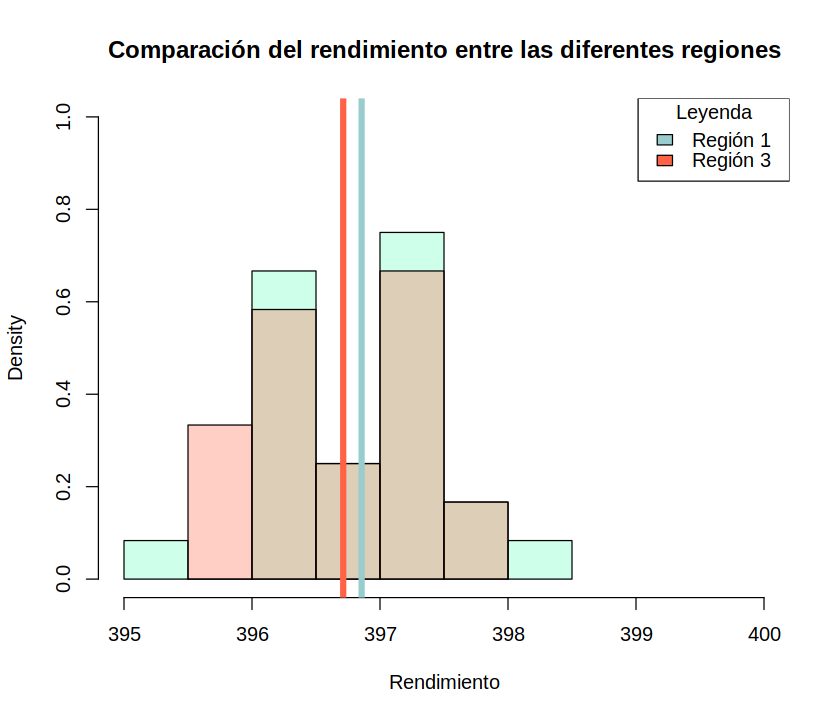

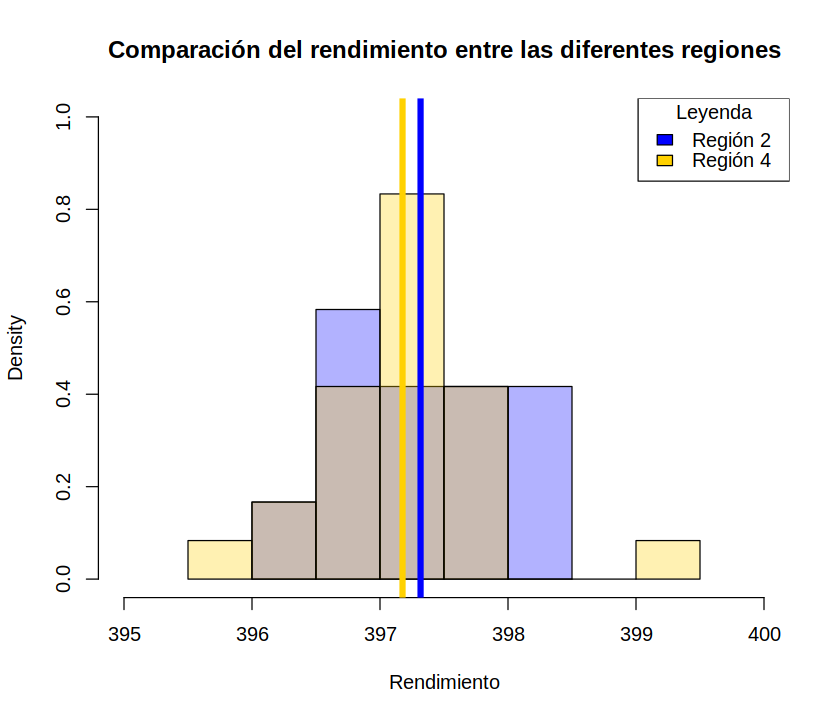

In [114]:
options(repr.plot.width = 7, repr.plot.height = 6)

hist(subset(datos_region,region=='1')[,'yield'],
    col = rgb(0.369,1,0.737,0.3),
    main = 'Comparación del rendimiento entre las diferentes regiones',
    ylim = c(0,1),
    xlim = c(395, 400),
    freq = F,
    xlab='Rendimiento') #verde
hist(subset(datos_region,region=='3')[,'yield'],
    col = rgb(1,0.384,0.272,0.3),
    ylim = c(0,1),
    xlim = c(395, 400),
    add = T,
    freq = F) #naranja

abline(v = mean(subset(datos_region,region=='1')[,'yield'])
       , col = rgb(0.6,0.8,0.8,1), lwd = 5)
abline(v = mean(subset(datos_region,region=='3')[,'yield'])
       , col = rgb(1,0.384,0.272,1), lwd = 5)

legend(x = "topright", legend = c("Región 1", "Región 3"), fill = c(rgb(0.6,0.8,0.8,1), rgb(1,0.384,0.272,1)), 
       title = "Leyenda")

hist(subset(datos_region,region=='2')[,'yield'],
    col = rgb(0,0,1,0.3),
    main = 'Comparación del rendimiento entre las diferentes regiones',
    freq = F,
    xlim = c(395, 400),
    xlab='Rendimiento',
    ylim=c(0,1)) #azul
hist(subset(datos_region,region=='4')[,'yield'],
    col = rgb(1,0.82,0,0.3),
    ylim = c(0,1),
    xlim = c(395, 400),
    add = T,
    freq = F) #amarillo


abline(v = mean(subset(datos_region,region=='2')[,'yield'])
       , col = rgb(0,0,1,1), lwd = 5)
abline(v = mean(subset(datos_region,region=='4')[,'yield'])
       , col = rgb(1,0.82,0,1), lwd = 5)

legend(x = "topright", legend = c("Región 2", "Región 4"), fill = c(rgb(0,0,1,1), rgb(1,0.82,0,1)), 
       title = "Leyenda")


- La distribución de los datos parece que pueda ser normal. 
- En el caso de la región 2, las observaciones comprendidas entre 397 y 398.35 se distribuyen uniformemente. 
- Las medias, aunque similares, son distintas en todas las regiones, siendo las de las regiones 4 y 2 más elevadas que las de las regiones 1 y 3.


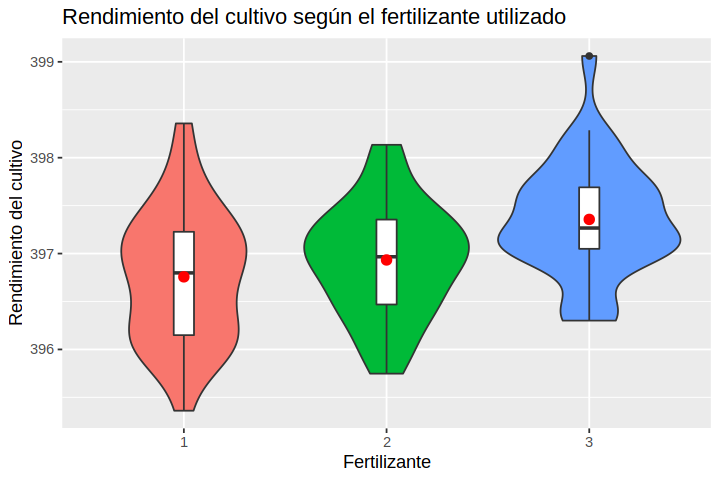

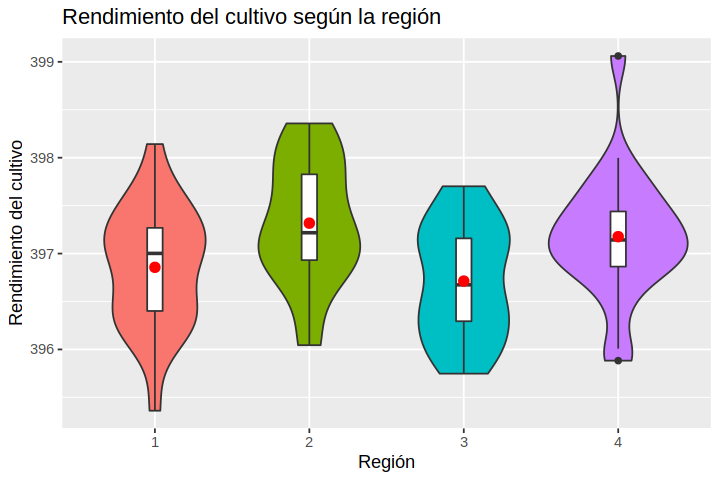

In [242]:
# violin plots
p = ggplot(datos_fertilizer, aes(factor(fertilizer), yield)) +
    xlab('Fertilizante') +
    ylab('Rendimiento del cultivo') + 
    ggtitle("Rendimiento del cultivo según el fertilizante utilizado" )
p + geom_violin(aes(fill = factor(fertilizer))) + 
    theme(legend.position="none") +
    geom_boxplot(width=.1) + stat_summary(fun=mean, geom="point", shape=20, size=4, color="red", fill="red")

p = ggplot(datos_region, aes(factor(region), yield)) +
    xlab('Región') +
    ylab('Rendimiento del cultivo') + 
    ggtitle("Rendimiento del cultivo según la región" )
p + geom_violin(aes(fill = factor(region))) + 
    theme(legend.position="none") +
    geom_boxplot(width=.1) + stat_summary(fun=mean, geom="point", shape=20, size=4, color="red", fill="red")

- Observando el gráfico de violín así como las medias y las desviaciones estándar por categoría parece ser que hay una notable diferencia entre las medias de rendimiento para los diferentes fertilizantes y regiones. 
- Podemos observar un valor atípico (outlier) en el bigote superior del fertilizante 3 y dos valores atípicos en la región 4 (uno en la parte superior del bigote y otro en la inferior).
- Las distribución de los datos parece no alejarse mucho de lo que podría ser una distribución normal, aunque esto lo corroboraremos en el siguiente punto mediante tests de normalidad como el Shapiro-wilk test. 

## Comprobación de condiciones 

Comprobamos las condiciones para poder aplicar el test ANOVA.

ANOVA (Analysis of Variance) es una técnica estadística que se utiliza para dos o más grupos para comprobar si existe una diferencia entre sus valores medios [1],[2].

Las suposiciones de ANOVA son:
- La distribución de los datos es normal
- La varianza es constante entre los grupos
- Las observaciones son independientes entre sí


### Normalidad

- Visualización: Q-Q Plot
- Prueba estadística: la prueba de Shapiro-wilk (muestras con menos de 50 observaciones: 32 para cada tipo de fertilizante y 24 para cada región).
    - H0: La variable presenta una distribución normal
    - H1: La variable presenta una distribución no normal
    - p-value > 0.05: No rechazar H0 (normal)
    - p-value < 0.05: Rechazar H0

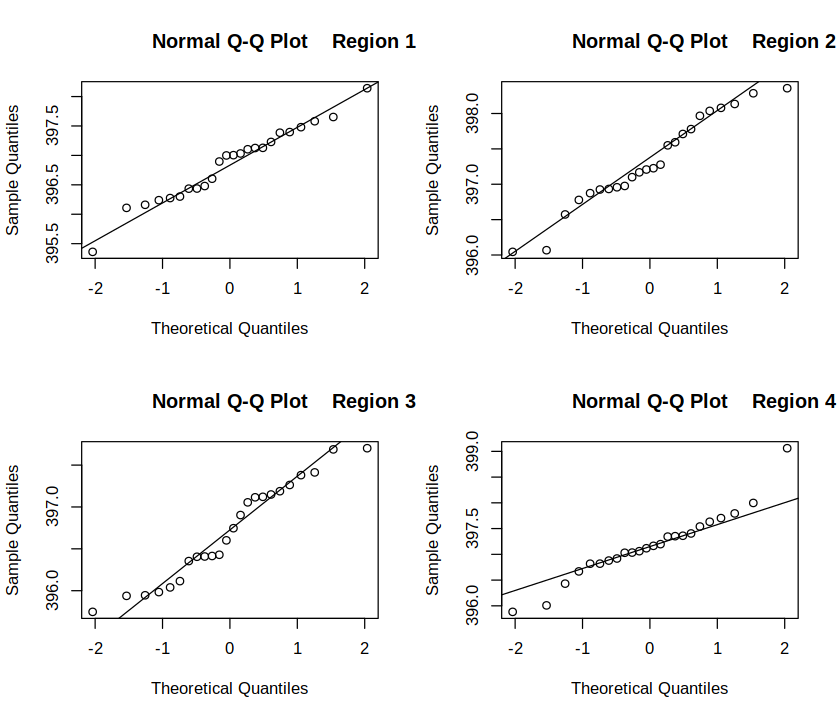

In [162]:
# Create normal probability plots for all regions
options(repr.plot.width = 7, repr.plot.height = 6)
par(mfrow = c(2,2))
for(i in unique(datos_region$region)){
  qqnorm(subset(datos_region, region == i)[,'yield'])
  qqline(subset(datos_region, region == i)[,'yield'])
  title(paste("\t\t\t\t\t\tRegion",i))
}

In [174]:
# Perform the Shapiro-Wilk test for all regions
for(i in unique(datos_region$region)){
    shapiro_test_regions<-shapiro.test(subset(datos_region, region == i)[,'yield'])
    # imprimimos el resultado del Shapiro-Wilk test para cada región
    print(shapiro_test_regions)
}


	Shapiro-Wilk normality test

data:  subset(datos_region, region == i)[, "yield"]
W = 0.97422, p-value = 0.7704


	Shapiro-Wilk normality test

data:  subset(datos_region, region == i)[, "yield"]
W = 0.95918, p-value = 0.4221


	Shapiro-Wilk normality test

data:  subset(datos_region, region == i)[, "yield"]
W = 0.94516, p-value = 0.2124


	Shapiro-Wilk normality test

data:  subset(datos_region, region == i)[, "yield"]
W = 0.94496, p-value = 0.2102



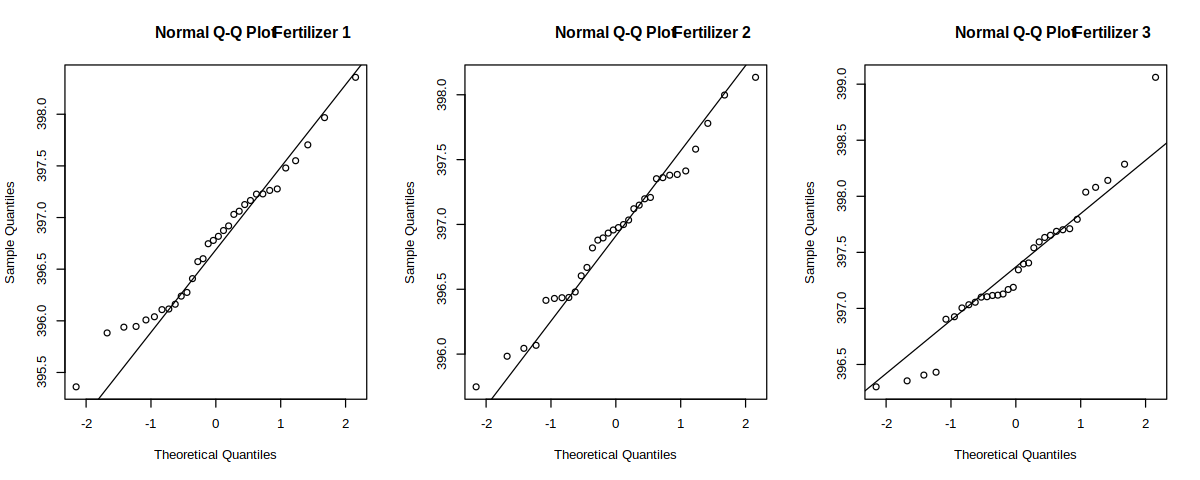

In [168]:
# Create normal probability plots for all fertilizers
options(repr.plot.width = 10, repr.plot.height = 4)
par(mfrow = c(1,3)) # nrow, ncol
for(i in unique(datos_fertilizer$fertilizer)){
  qqnorm(subset(datos_fertilizer, fertilizer == i)[,'yield'])
  qqline(subset(datos_fertilizer, fertilizer == i)[,'yield'])
  title(paste("\t\t\t\t\t\tFertilizer",i))
}

In [181]:
# Perform the Shapiro-Wilk test for all fertilizers
for(i in unique(datos_fertilizer$fertilizer)){
  shapiro_test_regions_fertilizers<-shapiro.test(subset(datos_fertilizer, fertilizer == i)[,'yield'])
    # imprimimos el resultado del Shapiro-Wilk test para cada fertilizante
    print(shapiro_test_regions_fertilizers)
}


	Shapiro-Wilk normality test

data:  subset(datos_fertilizer, fertilizer == i)[, "yield"]
W = 0.97914, p-value = 0.7743


	Shapiro-Wilk normality test

data:  subset(datos_fertilizer, fertilizer == i)[, "yield"]
W = 0.98329, p-value = 0.8875


	Shapiro-Wilk normality test

data:  subset(datos_fertilizer, fertilizer == i)[, "yield"]
W = 0.95878, p-value = 0.2542



- El Shapiro-Wilk test es una prueba de normalidad.
- Un p-value inferior a 0.05 se considera significativo, lo que significa que se puede rechazar la hipótesis nula de que los datos se distribuyen normalmente.
- En este caso, los p-values son superiores a 0.05 para todas las regiones y todos los fertilizantes, lo que significa que no hay pruebas suficientes para rechazar la hipótesis nula de que los datos se distribuyen normalmente.
- Esto significa que el rendimiento se distribuye normalmente en todas las regiones y para todos los fertilizantes.

No obstante, aunque los datos pasen la prueba de normalidad, es importante comprobar otros supuestos del ANOVA, como la homocedasticidad.

### Homocedasticidad

Homocedasticidad: las varianzas son iguales en todos los grupos.
-  Bartlett’s test: 
    - Para verificar el supuesto de que las varianzas son iguales en todos los grupos.
    - Compara las varianzas de k muestras, donde k puede ser más de dos muestras [3]. 
    - Los datos deben estar distribuidos normalmente.
    - Hipótesis nula H0: todas las varianzas de las poblaciones son iguales.
    - Hipótesis alternativa H1: al menos dos de ellas difieren.

In [204]:
# Bartlett’s test with one independent variable (fertilizer):
res_fertilizer <- bartlett.test(yield ~ fertilizer, data = datos_fertilizer)
res_fertilizer


	Bartlett test of homogeneity of variances

data:  yield by fertilizer
Bartlett's K-squared = 1.0622, df = 2, p-value = 0.5879


In [205]:
# Bartlett’s test with one independent variable (region):
res_region <- bartlett.test(yield ~ region, data = datos_region)
res_region


	Bartlett test of homogeneity of variances

data:  yield by region
Bartlett's K-squared = 0.24693, df = 3, p-value = 0.9697


- Podemos observar que tanto para fertilizer como para region, los p-values son superiores al nivel de significancia (p-value > 0.05). 

- Por tanto, no podemos rechazar la hipótesis nula y podemos concluir que las varianzas entre los 3 tipos de fertilizante son iguales y que las varianzas entre los 4 tipos de regiones también son iguales. 




### Independencia en las muestras

- En este caso, las muestras son independientes (fertilizante y región), se han tomado de forma independiente y no dependen de ninguna otra observación. La selección de uno no afecta a la selección del otro.
- No obstante, debemos tener en cuenta que en la realidad, el fertilizante y la región pueden no ser completamente independientes. Por ejemplo, ciertas regiones pueden ser más propicias para determinados tipos de cultivos, lo que a su vez puede afectar a la elección del fertilizante utilizado. Además, algunas regiones pueden tener más acceso a determinados tipos de fertilizante que otras.

Una vez hemos comprobado que se cumplen los supuestos de normalidad, homocedasticidad e independencia en las muestras, podemos aplicar el test ANOVA.

## One-Way ANOVA

- ANOVA unidireccional: se utiliza cuando se desea testear varios grupos considerando un único factor (o categoría) para ver si hay diferencias entre ellos. Es decir, para determinar si existen diferencias estadísticamente significativas entre las medias de dos o más grupos independientes (no relacionados).
    - H0: no hay diferencias entre los grupos
    - H1: hay algunos grupos que son diferentes
- Como queremos determinar si existe una diferencia significativa en el rendimiento medio (variable dependiente) entre los distintos tipos de fertilizante (variable independiente), realizamos un ANOVA unidireccional.

In [211]:
# Compute the analysis of variance: fertilizer
anova_fert <- aov(yield ~ fertilizer, datos_fertilizer)
summary(anova_fert)

            Df Sum Sq Mean Sq F value Pr(>F)    
fertilizer   2   6.07  3.0340   7.863  7e-04 ***
Residuals   93  35.89  0.3859                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

- Observamos que el p-value es inferior a 0.05, por tanto, podemos rechazar la hipótesis nula y decir que que existe una diferencia significativa en el rendimiento medio del cultivo entre los distintos tipos de fertilizantes. Uno o más fertilizantes tienen un rendimiento medio diferente. 

- Los *** junto al p-value indican que el resultado es altamente significativo desde el punto de vista estadístico.

- En este resultado no se especifica el tipo específico de fertilizante que produce el mejor resultado. Para ello, se podría realizar una prueba post-hoc como el Tukey's test o comparaciones múltiples para determinar qué fertilizantes tienen medias significativamente diferentes.

## Two-Way ANOVA

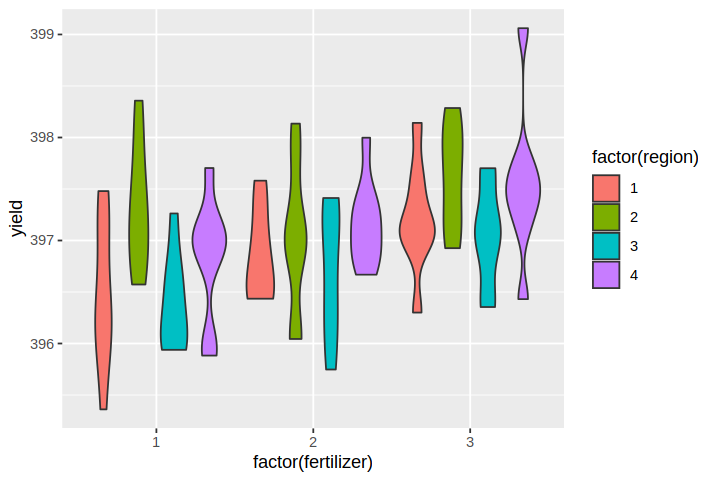

In [224]:
options(repr.plot.width = 6, repr.plot.height = 4)

p = ggplot(field_fert_reg_yield, aes(factor(fertilizer), yield))
p + geom_violin(aes(fill = factor(region)))

- Parece ser que no que hay muchas diferencias en las distribuciones y las medias, dependiendo del fertilizante y de la región.
- No obstante, este violin plot es poco claro. 
- Realizaremos una ANOVA bidireccional.

- ANOVA bidireccional: se utiliza para determinar si existe una diferencia significativa en las medias de dos o más grupos, teniendo en cuenta el efecto de dos factores sobre la variable de respuesta. 
    - Un ANOVA bidireccional es apropiado cuando se tienen múltiples variables independientes categóricas (en este caso, fertilizante y región) y una variable dependiente continua (en este caso, rendimiento).
    - Permitirá determinar los efectos principales de las variables independientes (fertilizante y región) sobre la variable dependiente (rendimiento) y también el efecto de interacción de ambas variables independientes sobre la variable dependiente. Por tanto, permitirá determinar si el efecto del fertilizante sobre el rendimiento varía en función de la región, y viceversa.
    - Tenemos 3 hipótesis nulas: 
        - H0 para el efecto principal del fertilizante: No hay diferencias significativas en el rendimiento entre los distintos tipos de fertilizante.
        - H0 para el efecto principal de la región: No hay diferencias significativas en el rendimiento entre las distintas regiones.
        - H0 para el efecto de interacción del fertilizante y la región: No existe un efecto de interacción significativo entre el fertilizante y la región sobre el rendimiento.

    - Las hipótesis alternativas para cada una de las hipótesis nulas anteriores son que existe una diferencia significativa en el rendimiento debido al fertilizante, a la región o a la interacción de ambos.



In [225]:
# two-way ANOVA for fertilizer and region
tw_anova <- aov(yield ~ fertilizer * region, field_fert_reg_yield) 
summary(tw_anova)

                  Df Sum Sq Mean Sq F value   Pr(>F)    
fertilizer         2  6.068  3.0340   8.799 0.000339 ***
region             3  5.608  1.8693   5.421 0.001856 ** 
fertilizer:region  6  1.315  0.2192   0.636 0.701266    
Residuals         84 28.963  0.3448                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

- Observamos que existe una diferencia significativa en el rendimiento entre los distintos tipos de fertilizante (p-value < 0.05, F-valor = 8.799) y las distintas regiones (p-value < 0.05, F-valor = 5.421). Los p-values son muy bajos y los F-values son altos, lo que significa que tanto el fertilizante como la región tienen un efecto significativo en el rendimiento.

- No obstante, el efecto de interacción del fertilizante y la región sobre el rendimiento no es significativo (p-value > 0.05, F-value = 0.636), lo que significa que el efecto del fertilizante sobre el rendimiento no varía en función de la región, y viceversa.

- En conclusión, estos resultados sugieren que tanto el fertilizante como la región tienen un efecto significativo sobre el rendimiento, pero no existe un efecto de interacción significativo entre ellos. Esto significa que el efecto del fertilizante sobre el rendimiento es consistente en todas las regiones, y el efecto de la región sobre el rendimiento es consistente en todos los tipos de fertilizante.


## Conclusión

En conclusión, los resultados sugieren que existe una diferencia significativa en el rendimiento medio del cultivo entre los distintos tipos de fertilizantes. Además, se ha visto que tanto el fertilizante como la región tienen un efecto significativo sobre el rendimiento. No obstante, el efecto del fertilizante sobre el rendimiento no varía en función de la región, y viceversa.

Debemos tener en cuenta que la altura, la temperatura y la humedad se consideran variables de confusión porque están relacionadas tanto con el resultado (rendimiento) como con las variables predictoras (fertilizante y región). Si no se controlan, estas variables podrían afectar a la relación entre el fertilizante, la región y el rendimiento, dificultando la determinación del verdadero efecto del fertilizante y la región sobre el rendimiento.


## Referencias

[1] Chen, L.-P. (2021). Practical Statistics for Data Scientists. Technometrics (Vol. 63, pp. 272–273).

[2] Hastie, T., Tibshirani, R., James, G., & Witten, D. (2021). An introduction to Statistical Learning with Applications in R (2nd Edition). Springer Texts, 102, 618.

[3] Compare multiple sample variances in R. STHDA. Retrieved January 17, 2023, from http://www.sthda.com/english/wiki/compare-multiple-sample-variances-in-r 


